In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.drop(["CustomerID"], axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


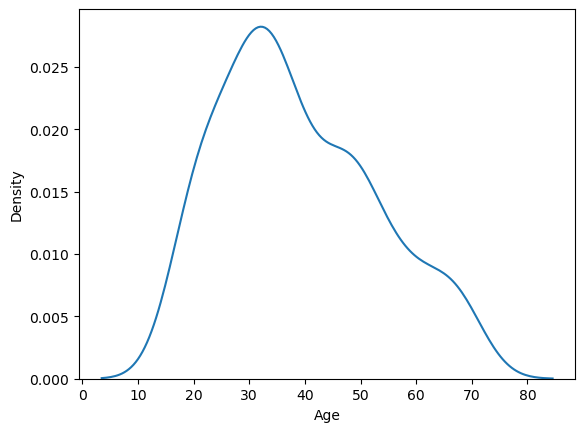

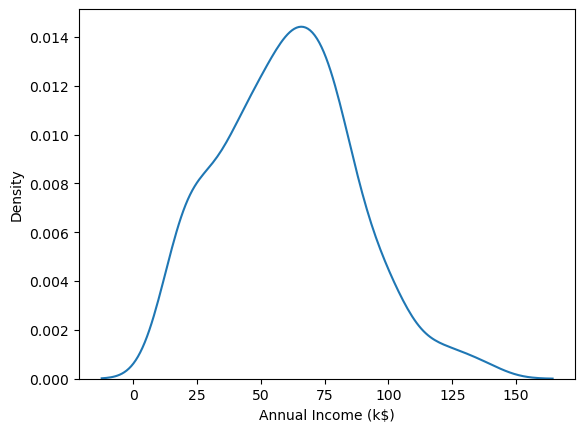

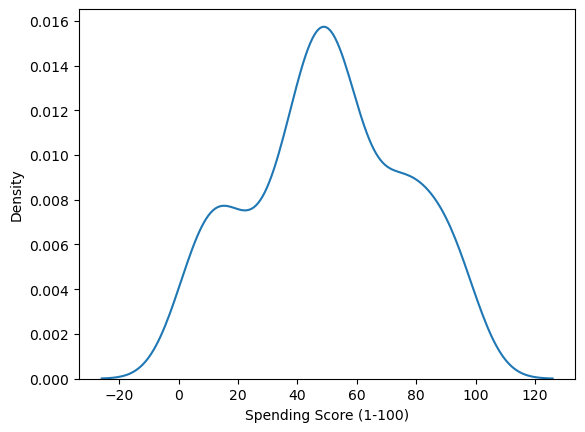

In [21]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i in columns:
    plt.figure()
    sns.kdeplot(df[i])

<Axes: xlabel='count', ylabel='Gender'>

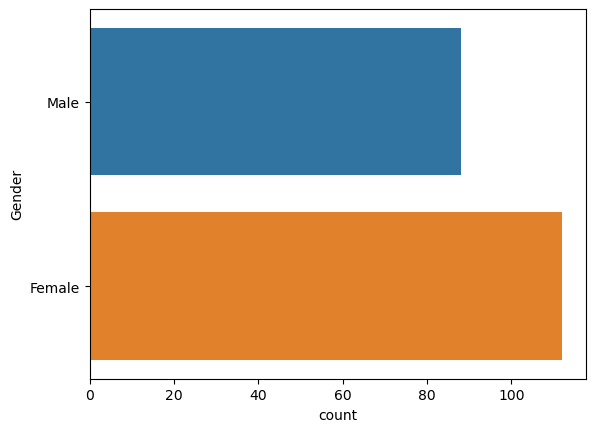

In [19]:
sns.countplot(y="Gender", data=df)

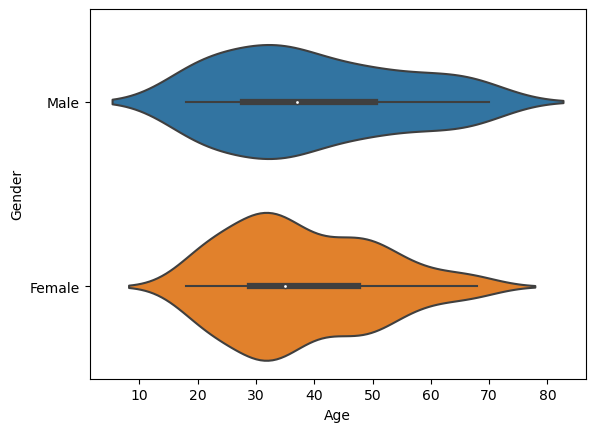

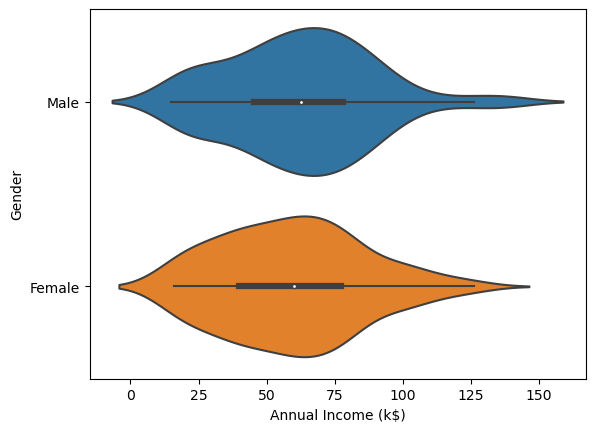

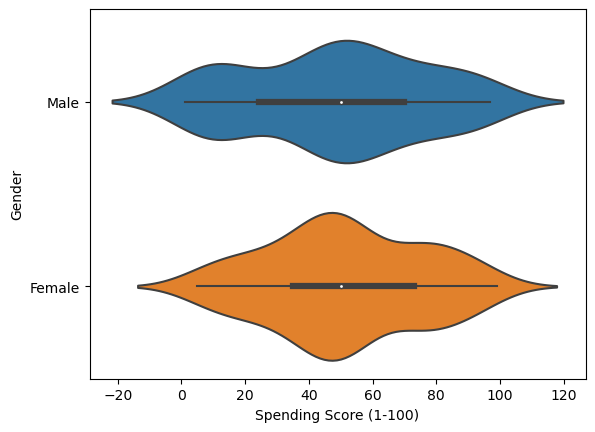

In [20]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i in columns:
    plt.figure()
    sns.violinplot(x=i, y="Gender", data=df)

<Axes: xlabel='Age', ylabel='Count'>

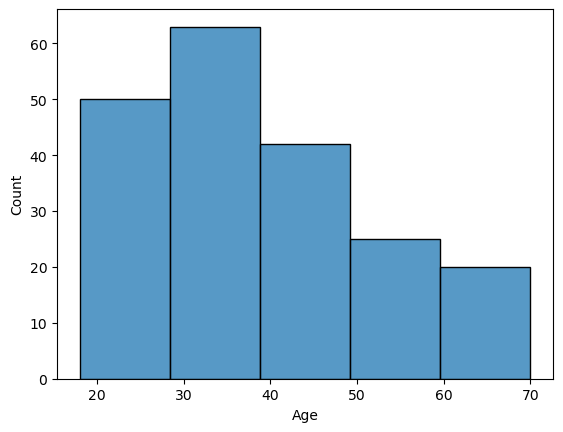

In [29]:
sns.histplot(df["Age"], bins=5)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

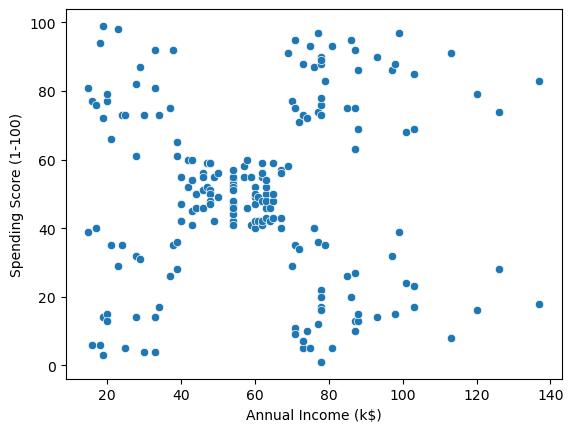

In [23]:
sns.scatterplot(df, x="Annual Income (k$)", y="Spending Score (1-100)")

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

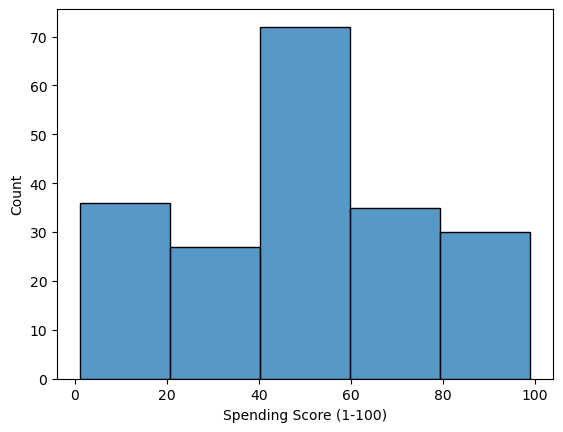

In [28]:
sns.histplot(df["Spending Score (1-100)"], bins=5)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

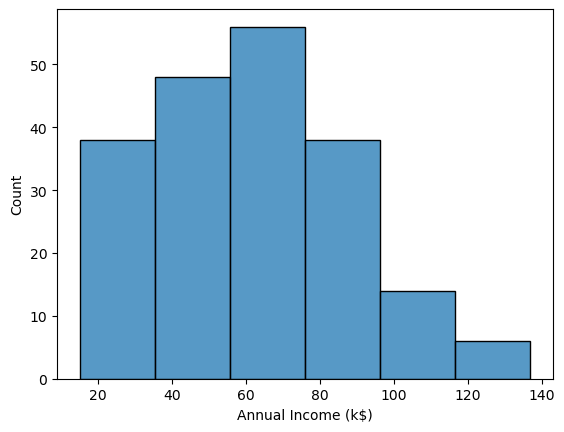

In [31]:
sns.histplot(df["Annual Income (k$)"], bins=6)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

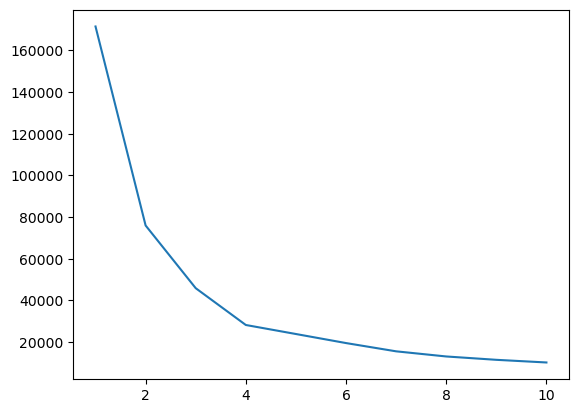

In [35]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)

4 clusters seem appropriate

In [36]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [38]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


Text(0, 0.5, 'Spending Score (1-100)')

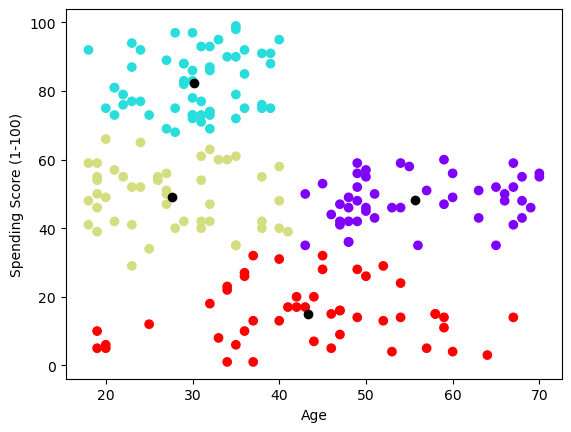

In [39]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

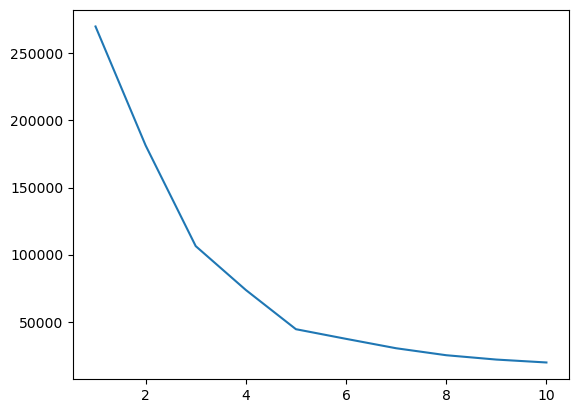

In [40]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)

5 clusters seem apporpriate

In [41]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [42]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


Text(0, 0.5, 'Spending Score (1-100)')

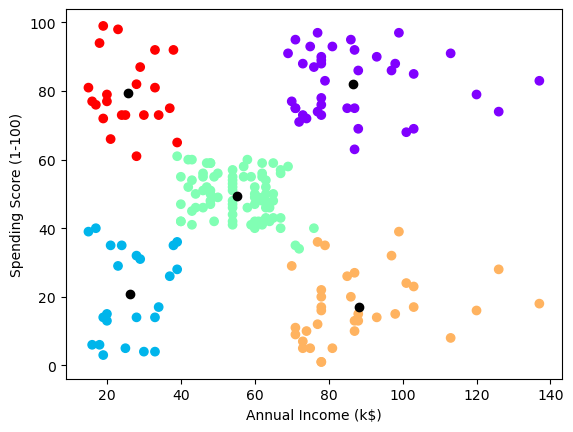

In [43]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")